In [ ]:
import numpy as np
import math, copy
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [ ]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    f_wb = X @ w + b
    cost = np.sum((f_wb - y) ** 2) / (2 * m)
    return np.squeeze(cost)

In [ ]:
def compute_gradient_matrix(X, y, w, b):
    m = X.shape[0]
    f_wb = X @ w + b
    e = f_wb - y
    dj_dw = (1 / m) * (X.T @ e)
    dj_db = (1 / m) * np.sum(e)
    return dj_db, dj_dw

In [ ]:
def gradient_descent(
    X, y, w_in, b_in, cost_function, gradient_function, num_iters, alpha
):
    m = len(X)
    hist = {}
    hist["cost"] = []
    hist["params"] = []
    hist["grads"] = []
    hist["iter"] = []
    w = copy.deepcopy(w_in)
    b = b_in
    save_interval = math.ceil(num_iters / 10000)

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i == 0 or i % save_interval == 0:
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w, b])
            hist["grads"].append([dj_dw, dj_db])
            hist["iter"].append(i)

        if i % math.ceil(num_iters / 10) == 0:
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")

    return w, b, hist

In [ ]:
def run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-6):
    m, n = X.shape
    initial_w = np.zeros(n)
    initial_b = 0
    w_out, b_out, hist_out = gradient_descent(
        X,
        y,
        initial_w,
        initial_b,
        compute_cost,
        compute_gradient_matrix,
        iterations,
        alpha,
    )
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    return (w_out, b_out)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.69806954], b: -52.0834


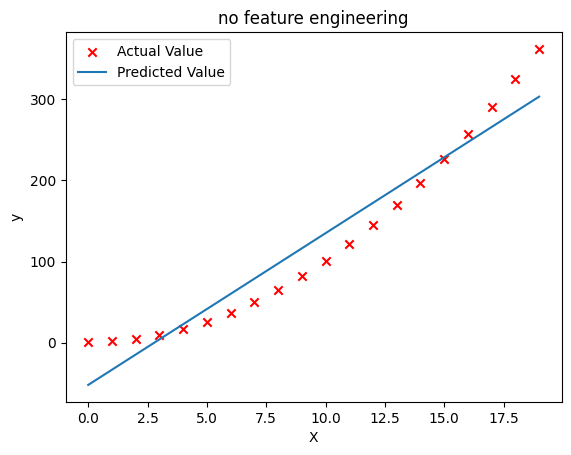

In [ ]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000, alpha=1e-2)

plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("no feature engineering")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Iteration         0, Cost: 7.32922e+03
Iteration     10000, Cost: 2.07057e-01
Iteration     20000, Cost: 1.88939e-01
Iteration     30000, Cost: 1.72406e-01
Iteration     40000, Cost: 1.57320e-01
Iteration     50000, Cost: 1.43554e-01
Iteration     60000, Cost: 1.30993e-01
Iteration     70000, Cost: 1.19531e-01
Iteration     80000, Cost: 1.09072e-01
Iteration     90000, Cost: 9.95276e-02
w,b found by gradient descent: w: [1.00276498], b: 0.3701


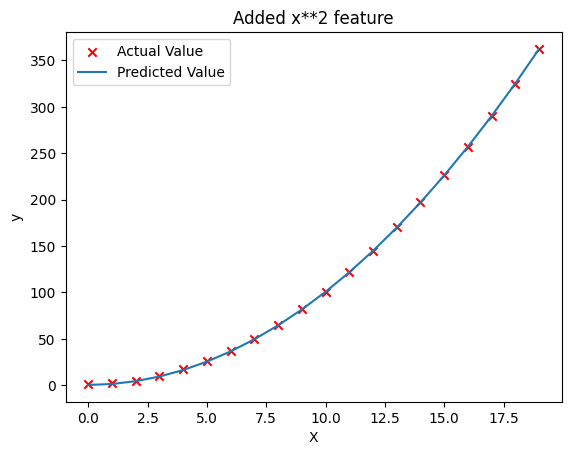

In [ ]:
x = np.arange(0, 20, 1)
y = x**2 + 1
X = x**2  # engineered feature
X = X.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-5)
plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("Added x**2 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08237526 0.53552137 0.02752216], b: 0.0106


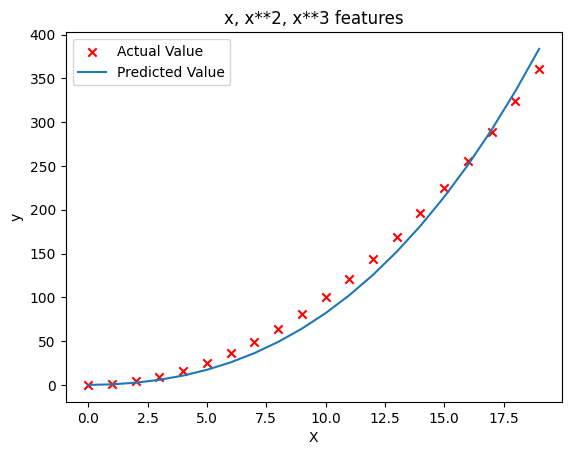

In [ ]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]
model_w, model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)
plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("x, x**2, x**3 features")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]
X_features = ["x", "x^2", "x^3"]

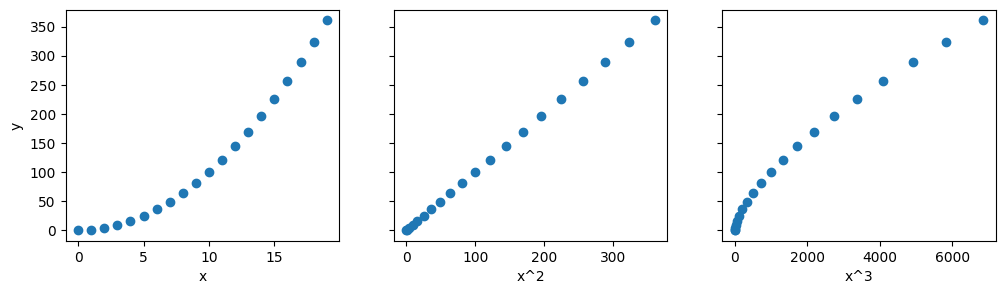

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [ ]:
def zscore_normalize_features(X, rtn_ms=False):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    if rtn_ms:
        return (X_norm, mu, sigma)
    else:
        return X_norm

In [ ]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X, axis=0)}")
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X, axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.26616827e-05 1.13494579e+02 8.43238778e-05], b: 123.5000


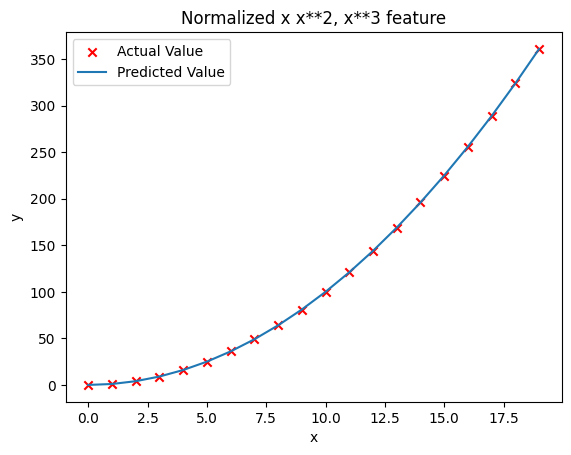

In [ ]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)
model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)
plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.0073


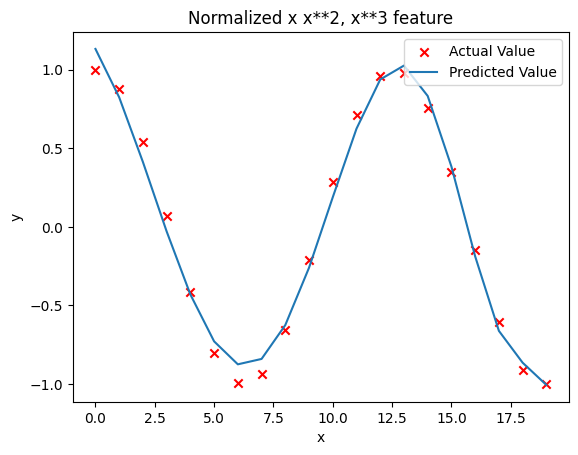

In [ ]:
x = np.arange(0, 20, 1)
y = np.cos(x / 2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha=1e-1)

plt.scatter(x, y, marker="x", c="r", label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(x, X @ model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()